In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

In [11]:
mnist = tf.keras.datasets.mnist
x_train, y_train, x_test,y_test = mnist.load_data()

In [12]:
print(f'shape of train features is : {x_train.shape}') 
print(f'shape of train targets is : {y_train.shape}')
print(f'shape of test features is : {x_test.shape}')
print(f'shape of test targets is : {y_test.shape}')

shape of train features is : (60000, 28, 28)
shape of train targets is : (60000,)
shape of test features is : (10000, 28, 28)
shape of test targets is : (10000,)


In [13]:
print(y_train)

[5 0 4 ... 5 6 8]


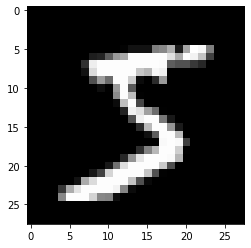

In [14]:
plt.imshow(x_train[0], cmap='gray')

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
class callBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.02):
      print("\nReached Minimal loss so cancelling training!")
      self.model.stop_training = True
callbacks = callBack()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 1s 730us/step - loss: 0.2437 - accuracy: 0.9283
Epoch 2/50
1875/1875 [==============================] - 1s 724us/step - loss: 0.1017 - accuracy: 0.9689
Epoch 3/50
1875/1875 [==============================] - 1s 721us/step - loss: 0.0709 - accuracy: 0.9778
Epoch 4/50
1875/1875 [==============================] - 1s 730us/step - loss: 0.0548 - accuracy: 0.9823
Epoch 5/50
1838/1875 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9865
Reached Minimal loss so cancelling training!
1875/1875 [==============================] - 1s 713us/step - loss: 0.0424 - accuracy: 0.9865


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 530us/step - loss: 0.0776 - accuracy: 0.9769


In [20]:
print(f'validation accuracy : {val_acc} & validation loss : {val_loss}')

validation accuracy : 0.9768999814987183 & validation loss : 0.07760646194219589


In [108]:
import cv2 as cv
def Digit(Model,Input):
    image = cv.imread(Input, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (28,28))
    image = 255-image          
    
    pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
    pred = np.argmax(pred)
    return pred